In [1]:
import h5py
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.lines import Line2D
from pandas.tseries.offsets import MonthEnd

# Données

In [2]:
quotes = pd.read_hdf("data/quotes.h5")
ed_quotes = quotes[quotes['alignement_politique'] == 'extremegauche_gaucheradicale'].copy()

In [3]:
presi_dates = [
    "21/04/2002", "5/05/2002",
    "22/04/2007", "6/05/2007",
    "22/04/2012", "6/05/2012",
    "21/04/2017", "7/05/2017",
    "10/04/2022", "24/04/2022"]
presi_months = pd.to_datetime(presi_dates, dayfirst=True).to_period('M').drop_duplicates()

legi_dates = [
    "09/06/2002", "16/06/2002",
    "10/06/2007", "17/06/2007",
    "10/06/2012", "17/06/2012",
    "11/06/2017", "18/06/2017",
    "12/06/2022", "19/06/2022"]
legi_months = pd.to_datetime(legi_dates, dayfirst=True).to_period('M').drop_duplicates()

regio_dates = [
    "15/03/1998",
    "21/03/2004", "28/03/2004",
    "14/03/2010", "21/03/2010",
    "06/12/2015", "13/12/2015",
    "20/06/2021", "27/06/2021"]
regio_months = pd.to_datetime(regio_dates, dayfirst=True).to_period('M').drop_duplicates()

canto_dates = [
    "15/03/1998", "22/03/1998",
    "11/03/2001", "18/03/2001",
    "21/03/2004", "28/03/2004",
    "9/03/2008", "16/03/2008",
    "20/03/2011", "27/03/2011"]
canto_months = pd.to_datetime(canto_dates, dayfirst=True).to_period('M').drop_duplicates()

dept_dates = [
    "22/03/2015", "29/03/2015",
    "20/06/2021", "27/06/2021"]
dept_months = pd.to_datetime(dept_dates, dayfirst=True).to_period('M').drop_duplicates()

muni_dates = [
    "11/03/2001", "18/03/2001",
    "09/03/2008", "16/03/2008",
    "23/03/2014", "30/03/2014",
    "15/03/2020", "28/06/2020"]
muni_months = pd.to_datetime(muni_dates, dayfirst=True).to_period('M').drop_duplicates()

europ_dates = [
    "13/06/1999",
    "13/06/2004",
    "7/06/2009",
    "25/05/2014",
    "26/05/2019"]
europ_months = pd.to_datetime(europ_dates, dayfirst=True).to_period('M').drop_duplicates()

In [4]:
main_elec_dates = presi_dates + legi_dates + europ_dates
main_elec_months = pd.to_datetime(main_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

other_elec_dates = regio_dates + canto_dates + dept_dates + muni_dates
other_elec_months = pd.to_datetime(other_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

all_elec_dates = presi_dates + legi_dates + regio_dates + canto_dates + dept_dates + muni_dates + europ_dates
all_elec_months = pd.to_datetime(all_elec_dates, dayfirst=True).to_period('M').drop_duplicates().sort_values()

# 1. Nombre de citations
## 1.1. Absolu

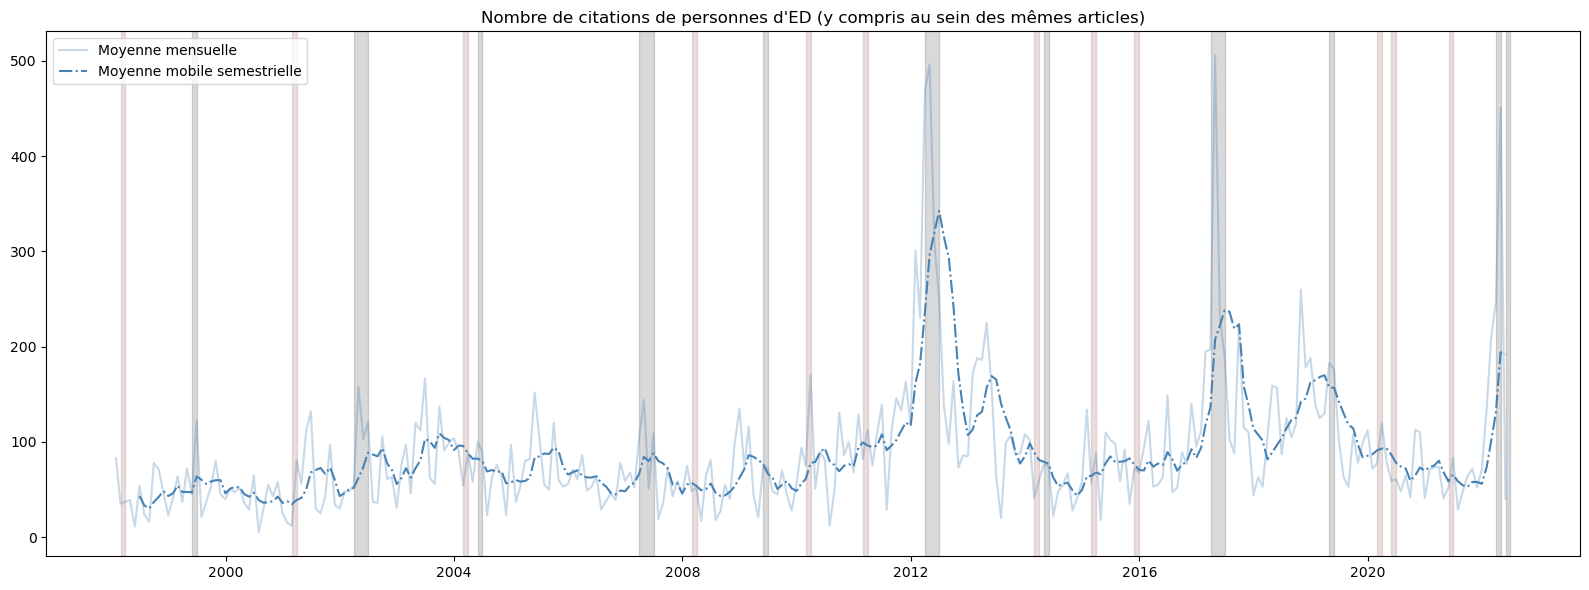

In [5]:
quotes_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME')).size().reset_index(name='quote_count')
quotes_monthly.columns = ['Mois', 'Nb cit']
quotes_monthly['6_month_MA'] = quotes_monthly['Nb cit'].rolling(window=6).mean()

plt.figure(figsize=(16, 6))
plt.plot(quotes_monthly['Mois'], quotes_monthly['Nb cit'], linestyle='-', color='steelblue', label='Moyenne mensuelle', alpha=0.3)
plt.plot(quotes_monthly['Mois'], quotes_monthly['6_month_MA'], linestyle='dashdot', color='steelblue', label='Moyenne mobile semestrielle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('')
plt.title("Nombre de citations de personnes d'ED (y compris au sein des mêmes articles)")
plt.legend()
plt.tight_layout()
plt.show()

## 1.2. Par article

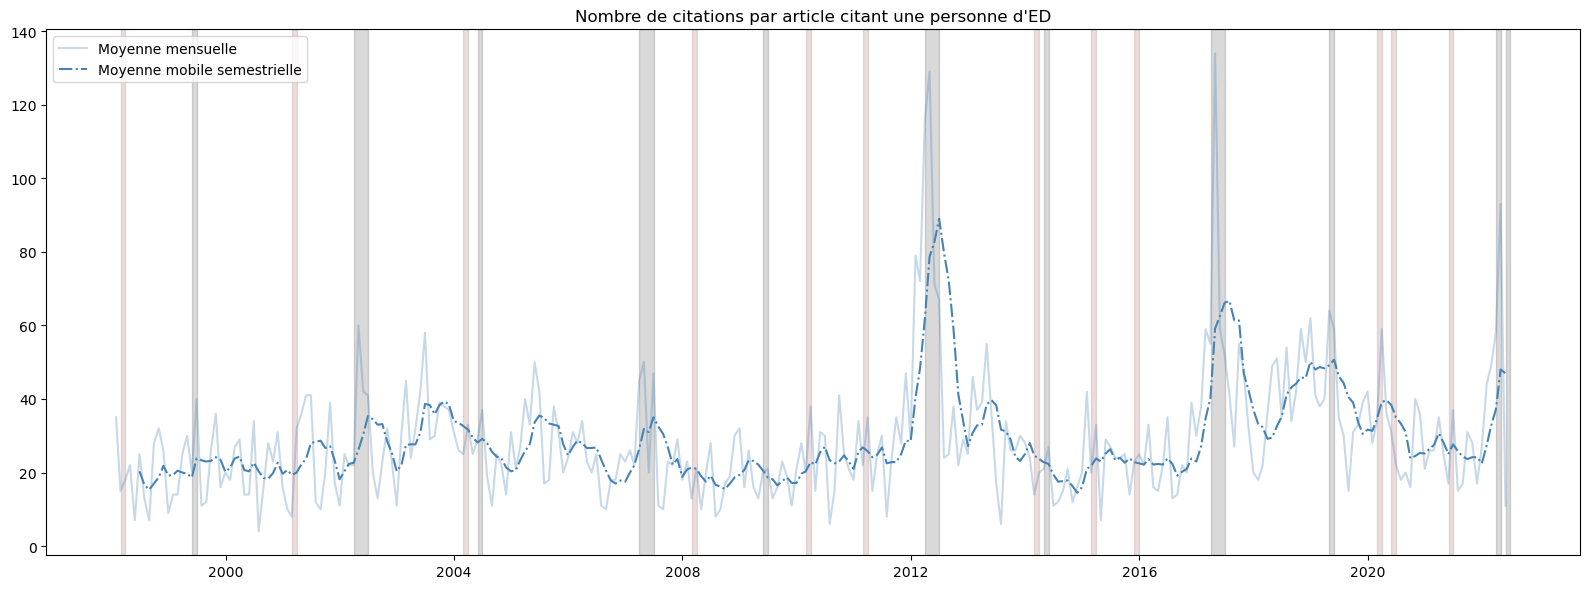

In [6]:
quotes_per_article_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
quotes_per_article_monthly.columns = ['Mois', 'Nb cit']
quotes_per_article_monthly['6_month_MA'] = quotes_per_article_monthly['Nb cit'].rolling(window=6).mean()

plt.figure(figsize=(16, 6))
plt.plot(quotes_per_article_monthly['Mois'], quotes_per_article_monthly['Nb cit'], linestyle='-', color='steelblue', label='Moyenne mensuelle', alpha=0.3)
plt.plot(quotes_per_article_monthly['Mois'], quotes_per_article_monthly['6_month_MA'], linestyle='dashdot', color='steelblue', label='Moyenne mobile semestrielle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('')
plt.title("Nombre de citations par article citant une personne d'ED")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Longueur des citations
## 2.1. Absolue

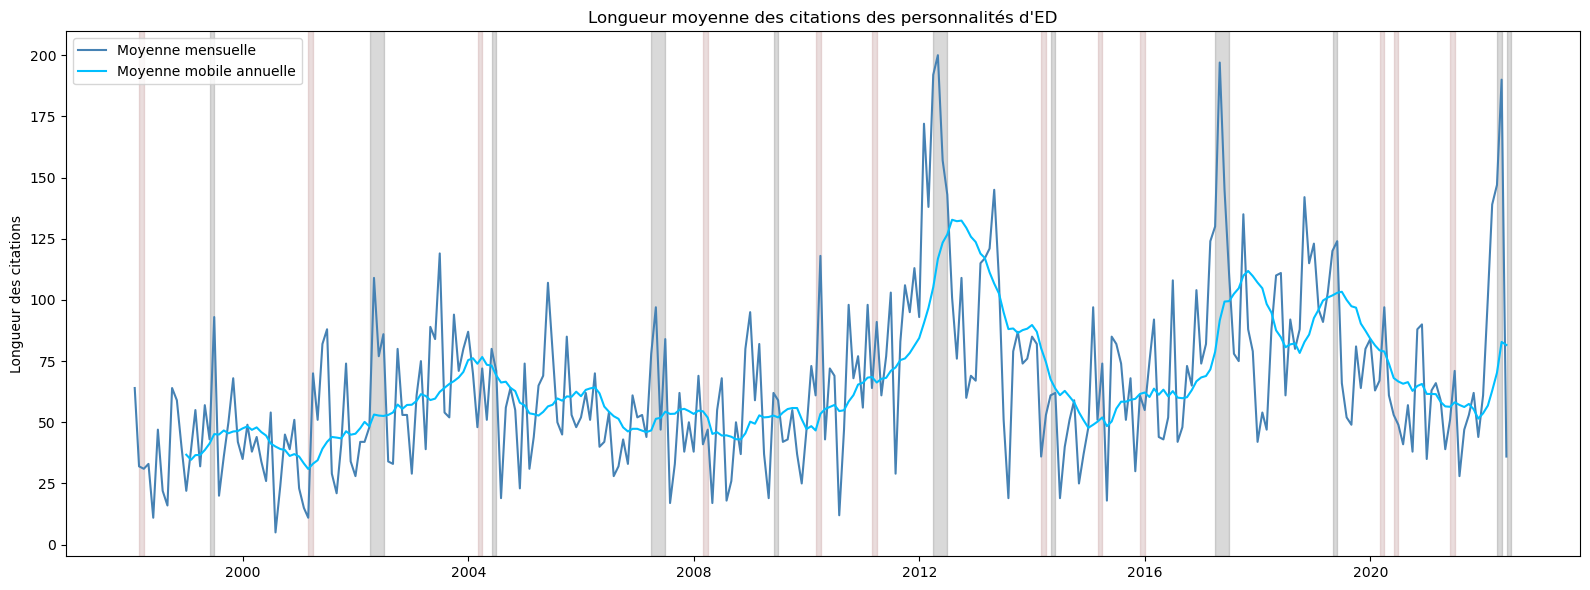

In [7]:
ed_quotes.loc[:, 'quote_length'] = ed_quotes['quotes'].apply(lambda x: len(x['Quote'][0].strip('«  »')))
quote_length_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['quote_length'].nunique().reset_index()
quote_length_monthly.columns = ['Mois', 'Longueur des citations']
quote_length_monthly['12_month_MA'] = quote_length_monthly['Longueur des citations'].rolling(window=12).mean()

plt.figure(figsize=(16, 6))
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['Longueur des citations'], marker='', linestyle='-', color='steelblue', label='Moyenne mensuelle')
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['12_month_MA'], marker='', linestyle='-', color='deepskyblue', label='Moyenne mobile annuelle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('Longueur des citations')
plt.title("Longueur moyenne des citations des personnalités d'ED")
plt.legend()
plt.tight_layout()
plt.show()

## 2.2. En proportion de la longueur des articles

/tmp/ipykernel_10432/3780915519.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quote_length_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME')).apply(


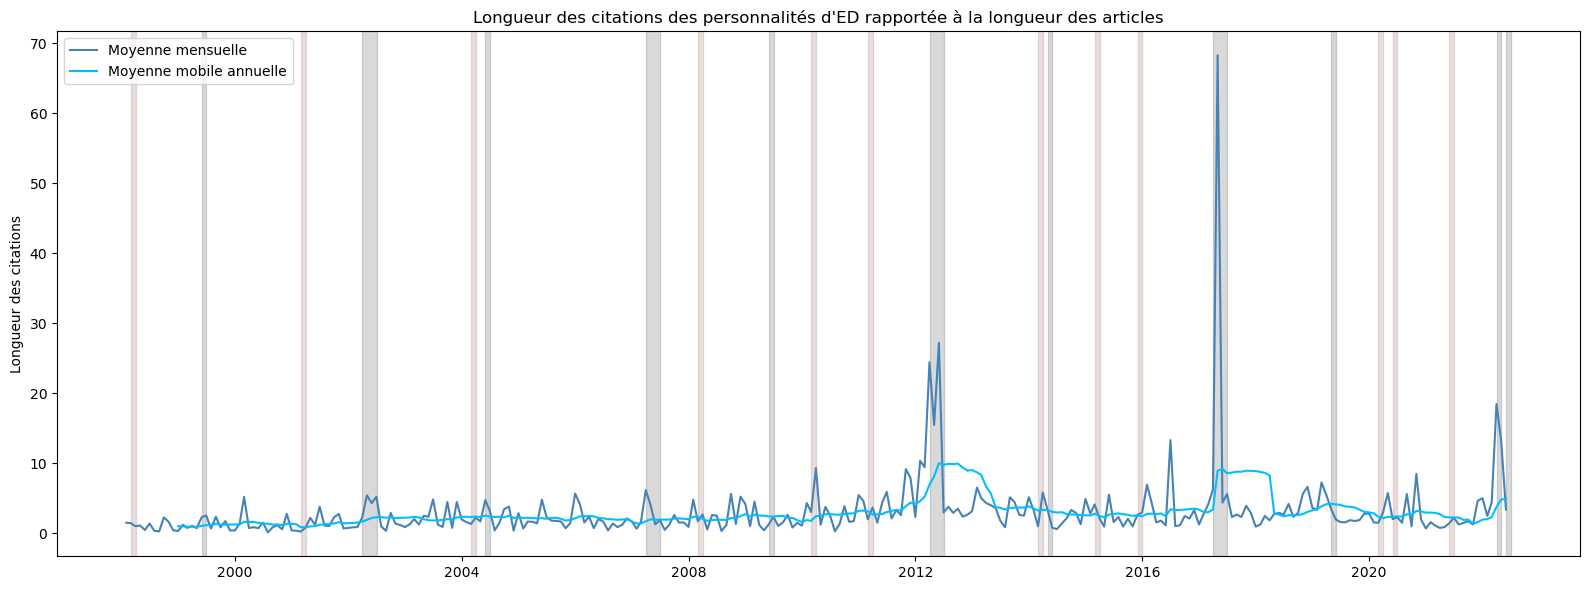

In [8]:
ed_quotes.loc[:, 'quote_length'] = ed_quotes['quotes'].apply(lambda x: len(x['Quote'][0].strip('«  »')))
quote_length_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME')).apply(
    lambda group: (group['quote_length'].sum() / group['n_char'].iloc[0])  # Normalize by the first n_char in the group
).reset_index(name='normalized_quote_length')
quote_length_monthly.columns = ['Mois', 'Longueur des citations']
quote_length_monthly['12_month_MA'] = quote_length_monthly['Longueur des citations'].rolling(window=12).mean()

plt.figure(figsize=(16, 6))
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['Longueur des citations'], marker='', linestyle='-', color='steelblue', label='Moyenne mensuelle')
plt.plot(quote_length_monthly['Mois'], quote_length_monthly['12_month_MA'], marker='', linestyle='-', color='deepskyblue', label='Moyenne mobile annuelle')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.xlabel('')
plt.ylabel('Longueur des citations')
plt.title("Longueur des citations des personnalités d'ED rapportée à la longueur des articles")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Nombre d'articles citant l'ED

Variable = articles uniques, indépendamment du nombre de citations

## 3.1. ED seule (+ proportion du total des articles)

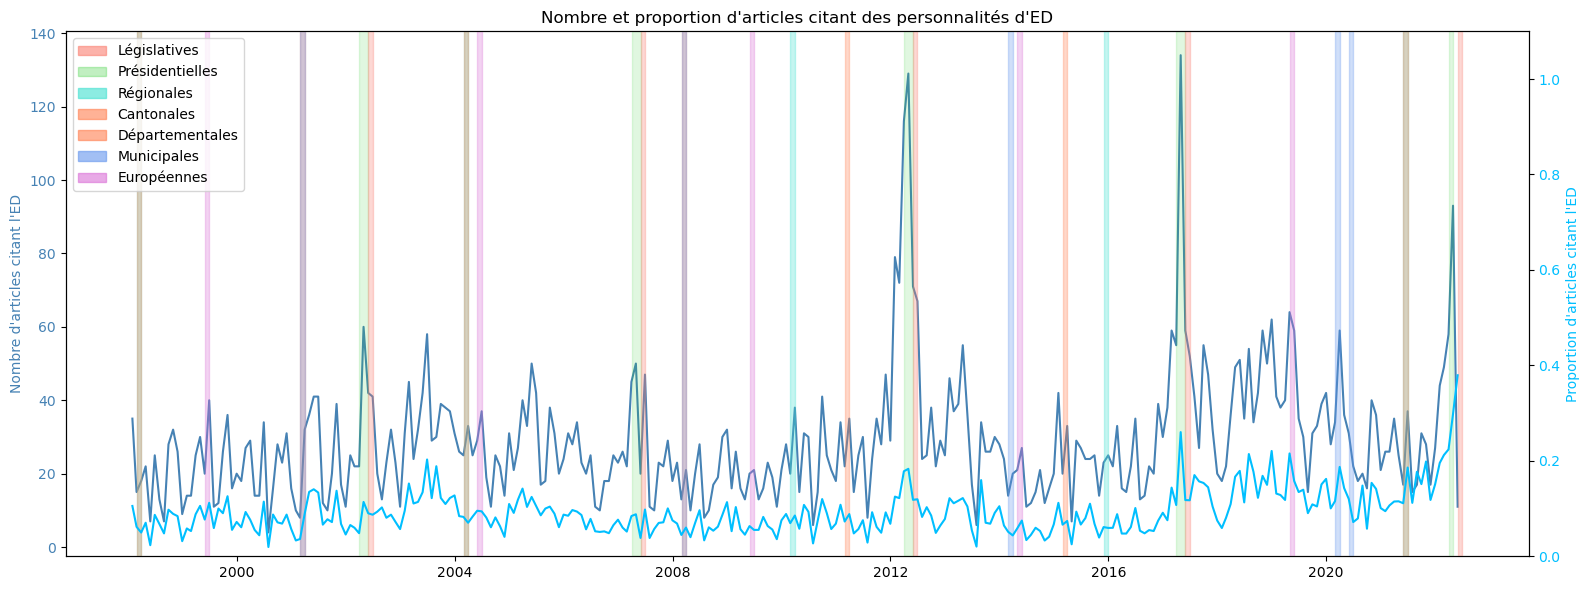

In [9]:
ed_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
ed_monthly.columns = ['Mois', 'Articles']
all_monthly = quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
all_monthly.columns = ['Mois', 'Articles']
plot_data = pd.merge(all_monthly, ed_monthly, on='Mois', how='left').fillna(0)
plot_data['prop_ed'] = plot_data['Articles_y'] / plot_data['Articles_x']

fig, ax1 = plt.subplots(figsize=(16, 6))

# Effectifs
ax1.plot(plot_data['Mois'], plot_data['Articles_y'], color="steelblue")
ax1.set_ylabel("Nombre d'articles citant l'ED", color="steelblue")
ax1.tick_params(axis='y', labelcolor="steelblue")

# Proportions
ax2 = ax1.twinx()
ax2.plot(plot_data['Mois'], plot_data['prop_ed'], color="deepskyblue")
ax2.set_ylabel("Proportion d'articles citant l'ED", color="deepskyblue")
ax2.tick_params(axis='y', labelcolor="deepskyblue")
ax2.set_ylim(0, 1.1)

# Périodes électorales
start_period = None
for i, period in enumerate(presi_months):
    if start_period is None:
        start_period = period
    if i == len(presi_months) - 1 or presi_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='limegreen', alpha=0.15)
        start_period = None
presi_months_patch = mpatches.Patch(color='limegreen', alpha=0.3, label='Présidentielles')

for period in legi_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='salmon', alpha=0.3)
legi_months_patch = mpatches.Patch(color='salmon', alpha=0.6, label='Législatives')

for period in regio_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='turquoise', alpha=0.3)
regio_months_patch = mpatches.Patch(color='turquoise', alpha=0.6, label='Régionales')

for period in canto_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='coral', alpha=0.3)
canto_months_patch = mpatches.Patch(color='coral', alpha=0.6, label='Cantonales')

for period in dept_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='coral', alpha=0.3)
dept_months_patch = mpatches.Patch(color='coral', alpha=0.6, label='Départementales')

for period in muni_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='cornflowerblue', alpha=0.3)
muni_months_patch = mpatches.Patch(color='cornflowerblue', alpha=0.6, label='Municipales')

for period in europ_months:
    start = period.to_timestamp()
    end = (start + MonthEnd(1))
    plt.axvspan(start, end, color='orchid', alpha=0.3)
europ_months_patch = mpatches.Patch(color='orchid', alpha=0.6, label='Européennes')

plt.legend(handles=[legi_months_patch, presi_months_patch, regio_months_patch, canto_months_patch, dept_months_patch, muni_months_patch, europ_months_patch])

plt.title("Nombre et proportion d'articles citant des personnalités d'ED")
plt.tight_layout()
plt.show()

## 3.2. ED face aux autres partis marginaux

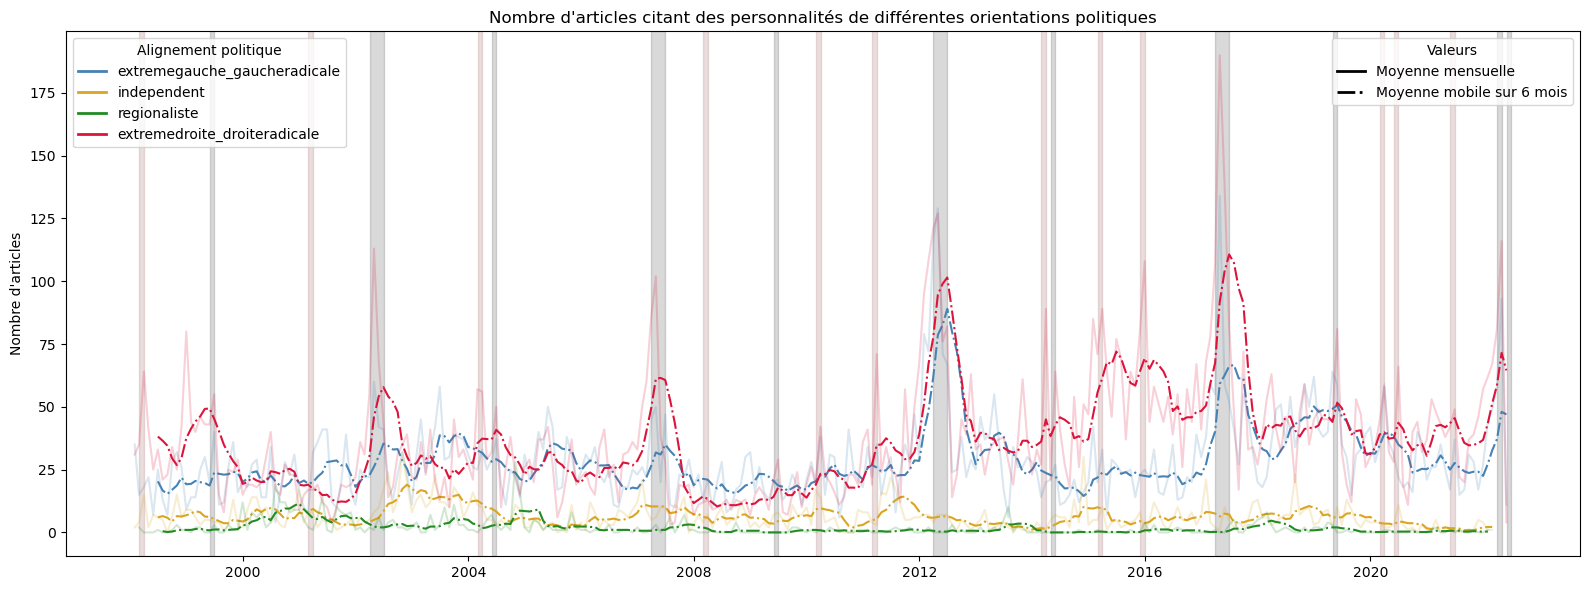

In [10]:
political_alignments = [
    'extremegauche_gaucheradicale',
    'independent',
    'regionaliste',
    'extremedroite_droiteradicale']

colors = {
    'extremegauche_gaucheradicale': 'steelblue',
    'independent': 'goldenrod',
    'regionaliste': 'forestgreen',
    'extremedroite_droiteradicale': 'crimson'}

alignment_handles = []
line_type_handles = []

plt.figure(figsize=(16, 6))

for alignment in political_alignments:
    subset_quotes = quotes[quotes['alignement_politique'] == alignment]
    monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
    monthly_counts.columns = ['Mois', 'Articles']
    monthly_counts['MA'] = monthly_counts['Articles'].rolling(window=6).mean()

    plt.plot(monthly_counts['Mois'], monthly_counts['Articles'], color=colors[alignment], alpha=0.2)
    plt.plot(monthly_counts['Mois'], monthly_counts['MA'], color=colors[alignment], linestyle='dashdot')
    alignment_handles.append(Line2D([0], [0], color=colors[alignment], lw=2, label=alignment))

alignment_legend = plt.legend(handles=alignment_handles, title="Alignement politique", loc="upper left")
plt.gca().add_artist(alignment_legend)

line_type_handles.append(Line2D([0], [0], color='black', lw=2, label="Moyenne mensuelle"))
line_type_handles.append(Line2D([0], [0], color='black', lw=2, linestyle='dashdot', label="Moyenne mobile sur 6 mois"))
plt.legend(handles=line_type_handles, title="Valeurs", loc="upper right")

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.title("Nombre d'articles citant des personnalités de différentes orientations politiques")
plt.xlabel("")
plt.ylabel("Nombre d'articles")
plt.tight_layout()
plt.show()

## 3.3. Partis de gouvernement
Présentés séparément pour la lisibilité du graph

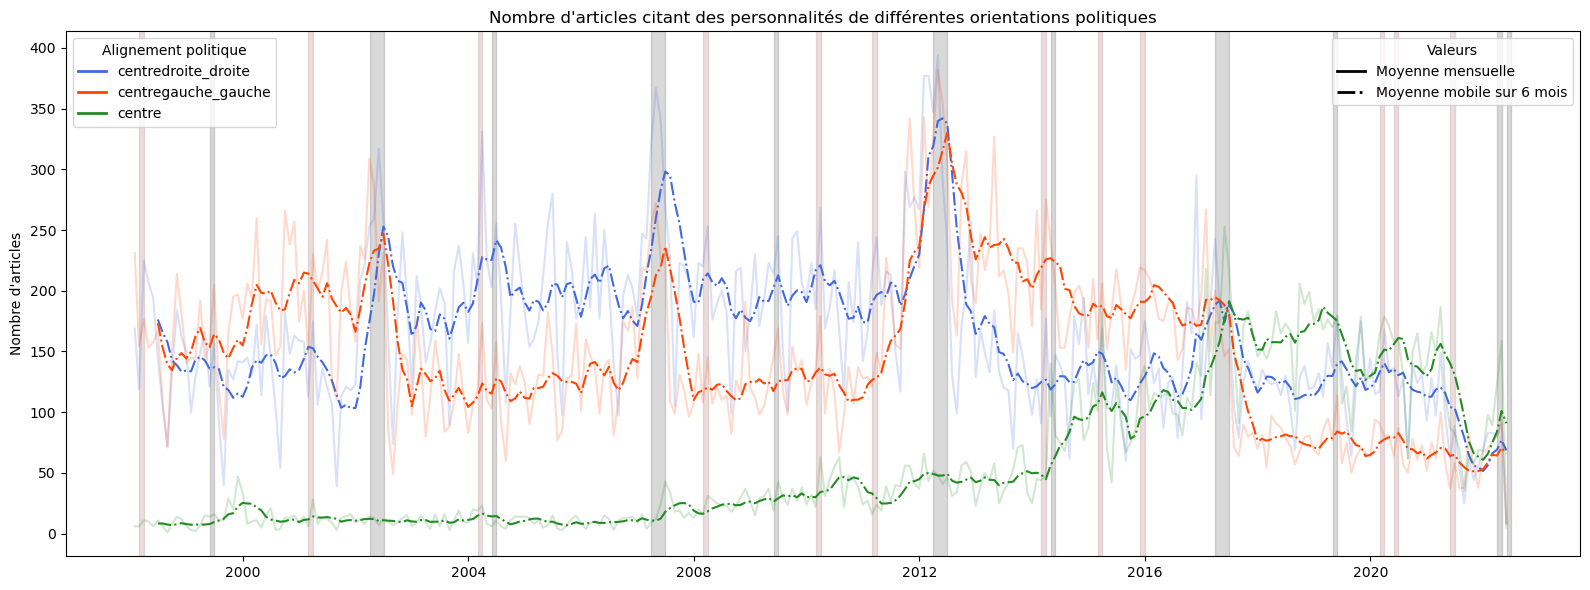

In [11]:
political_alignments = [
    'centredroite_droite', 
    'centregauche_gauche',
    'centre']

colors = {
    'centredroite_droite': 'royalblue',
    'centregauche_gauche': 'orangered',
    'centre': 'forestgreen'}

alignment_handles = []
line_type_handles = []

plt.figure(figsize=(16, 6))

for alignment in political_alignments:
    subset_quotes = quotes[quotes['alignement_politique'] == alignment]
    monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
    monthly_counts.columns = ['Mois', 'Articles']
    monthly_counts['MA'] = monthly_counts['Articles'].rolling(window=6).mean()

    plt.plot(monthly_counts['Mois'], monthly_counts['Articles'], color=colors[alignment], alpha=0.2)
    plt.plot(monthly_counts['Mois'], monthly_counts['MA'], color=colors[alignment], linestyle='dashdot')
    alignment_handles.append(Line2D([0], [0], color=colors[alignment], lw=2, label=alignment))

alignment_legend = plt.legend(handles=alignment_handles, title="Alignement politique", loc="upper left")
plt.gca().add_artist(alignment_legend)

line_type_handles.append(Line2D([0], [0], color='black', lw=2, label="Moyenne mensuelle"))
line_type_handles.append(Line2D([0], [0], color='black', lw=2, linestyle='dashdot', label="Moyenne mobile sur 6 mois"))
plt.legend(handles=line_type_handles, title="Valeurs", loc="upper right")

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.title("Nombre d'articles citant des personnalités de différentes orientations politiques")
plt.xlabel("")
plt.ylabel("Nombre d'articles")
plt.tight_layout()
plt.show()

## 3.4. ED en fonction des journaux

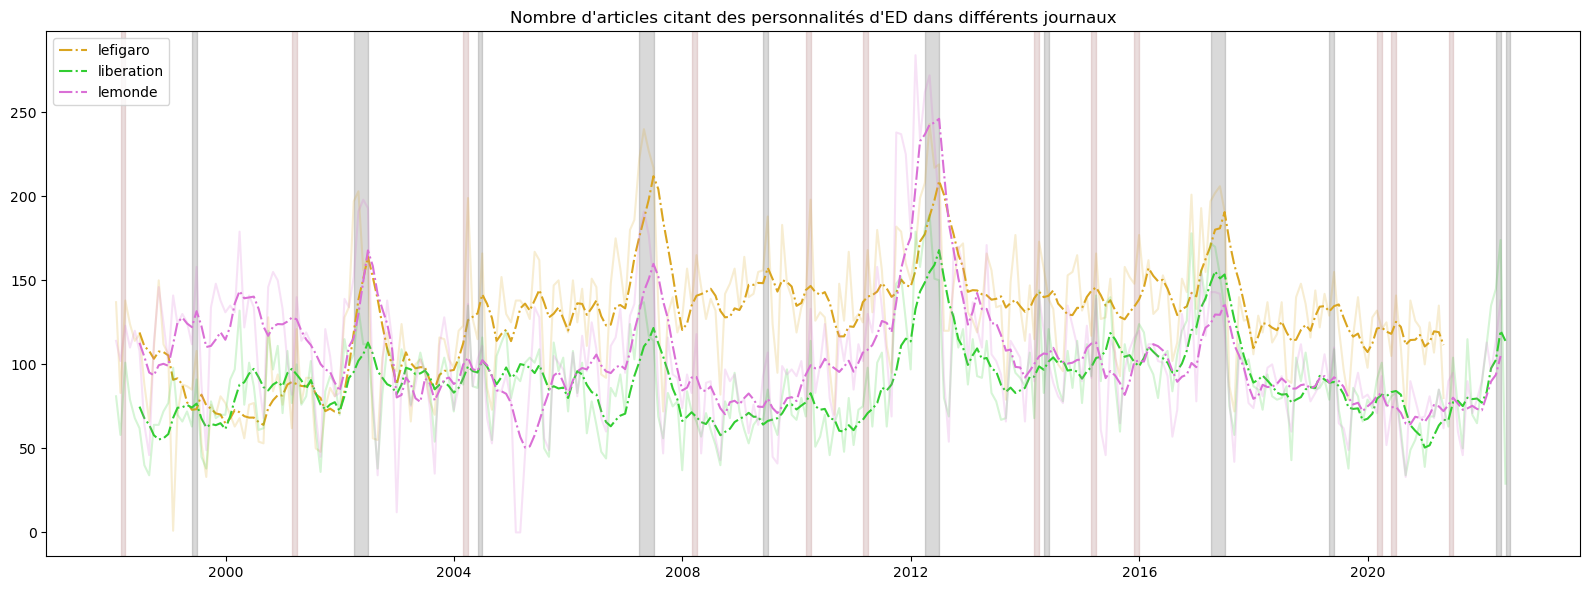

In [12]:
journals = ['lefigaro', 'liberation', 'lemonde']
colors = {
    'lefigaro': 'goldenrod',
    'liberation': 'limegreen',
    'lemonde': 'orchid'}

plt.figure(figsize=(16, 6))

for journal in journals:
    subset_quotes = quotes[quotes['journal'] == journal]
    monthly_counts = subset_quotes.groupby(pd.Grouper(key='date', freq='ME'))['titre'].nunique().reset_index()
    monthly_counts.columns = ['Mois', 'Articles']
    monthly_counts['MA'] = monthly_counts['Articles'].rolling(window=6).mean()
    plt.plot(monthly_counts['Mois'], monthly_counts['Articles'], color=colors[journal], alpha=0.2)
    plt.plot(monthly_counts['Mois'], monthly_counts['MA'], label=f"{journal}", color=colors[journal], linestyle='dashdot')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend()
plt.title("Nombre d'articles citant des personnalités d'ED dans différents journaux")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4. Modalités de citation
## 4.1. Type

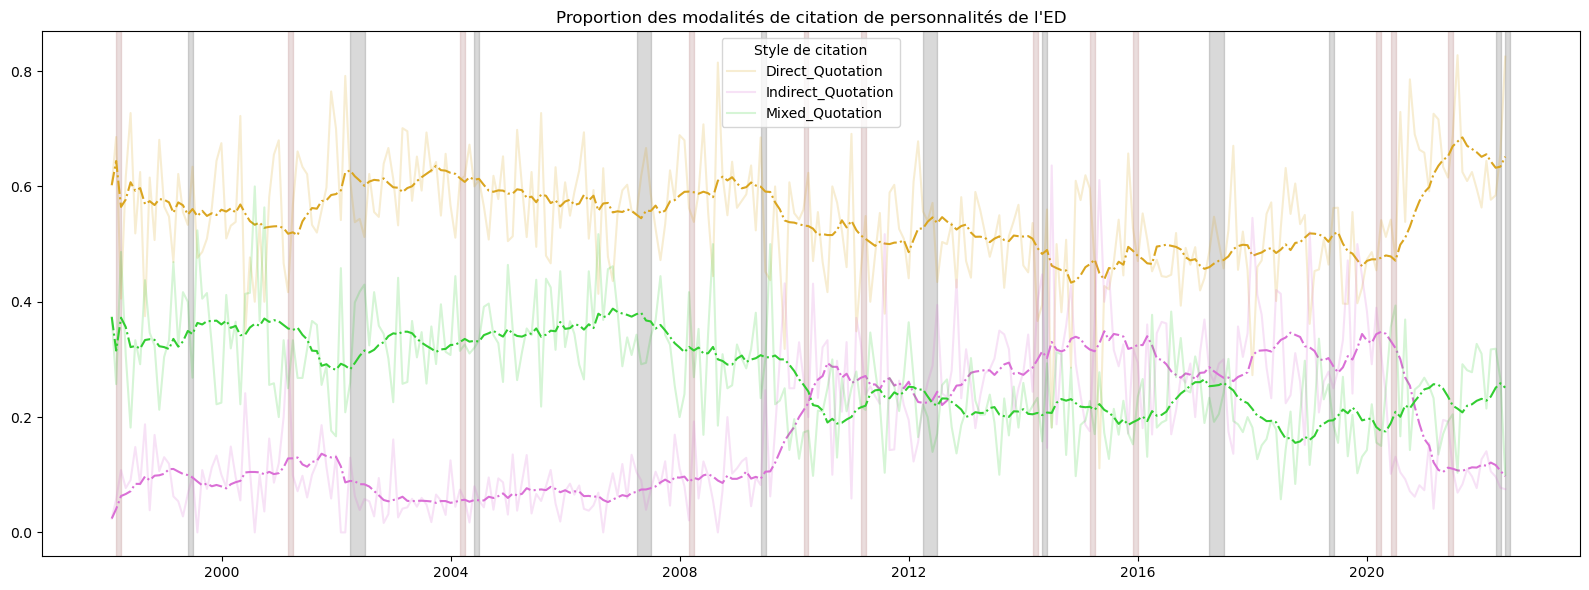

In [13]:
ed_quotes.loc[:, 'quote_style'] = ed_quotes['quotes'].apply(lambda x: str(x['Quote'][3]))
ed_style_monthly = ed_quotes.groupby([pd.Grouper(key='date', freq='ME'), 'quote_style']).size().reset_index(name='count')
ed_style_monthly_pivot = ed_style_monthly.pivot(index='date', columns='quote_style', values='count').fillna(0)
ed_style_monthly_pivot = ed_style_monthly_pivot.div(ed_style_monthly_pivot.sum(axis=1), axis=0)
ed_style_monthly_pivot_ma = ed_style_monthly_pivot.rolling(window=12, min_periods=1).mean()

types = ['Direct_Quotation', 'Mixed_Quotation', 'Indirect_Quotation']
colors = {
    'Direct_Quotation': 'goldenrod',
    'Mixed_Quotation': 'limegreen',
    'Indirect_Quotation': 'orchid'}

plt.figure(figsize=(16, 6))

for style in ed_style_monthly_pivot.columns:
    plt.plot(ed_style_monthly_pivot.index, ed_style_monthly_pivot[style], label=f'{style}',  color=colors[style], alpha=0.2)
    plt.plot(ed_style_monthly_pivot_ma.index, ed_style_monthly_pivot_ma[style], color=colors[style], linestyle='dashdot')

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend(title="Style de citation")
plt.title("Proportion des modalités de citation de personnalités de l'ED")
plt.tight_layout()
plt.show()

## 4.2. Position
Je n'ai pas compris où se trouvait cette information !

# 5. Journalistes et personnalités

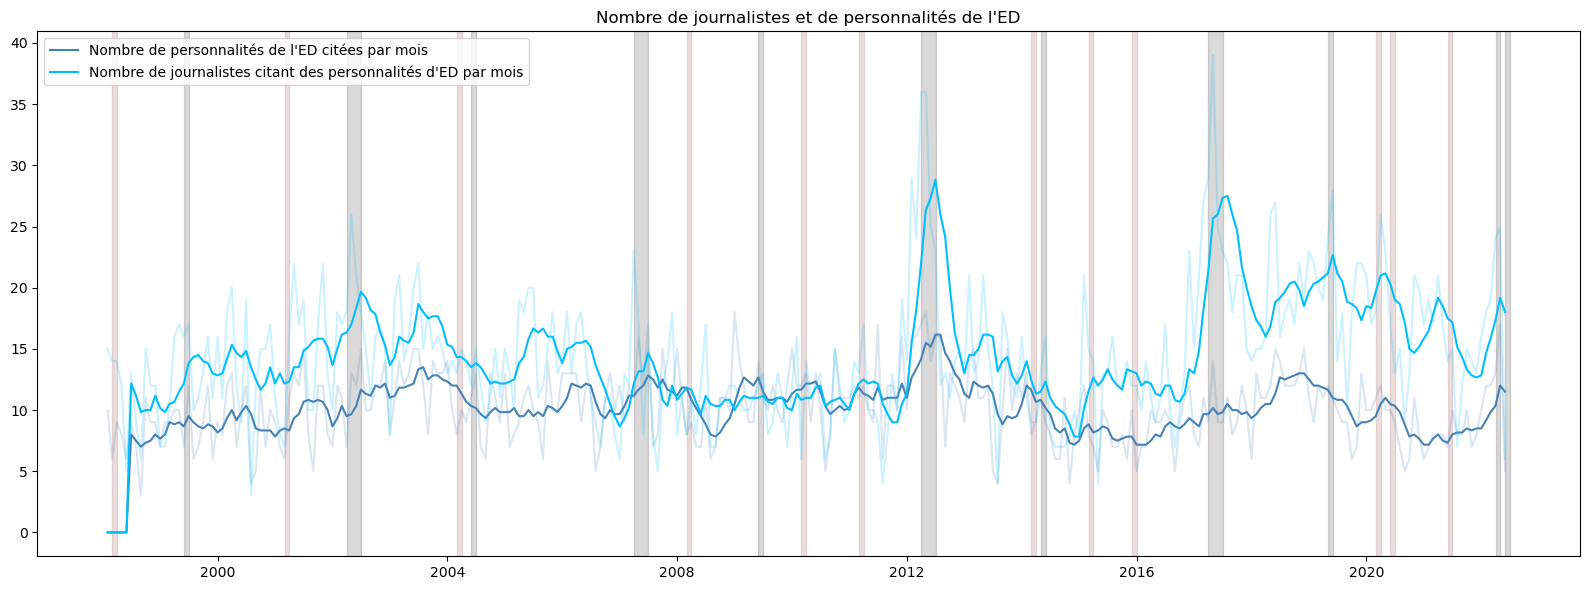

In [14]:
ed_pers_monthly = ed_quotes.groupby(pd.Grouper(key='date', freq='ME'))['name_surname'].nunique().reset_index()
ed_pers_monthly.columns = ['Mois', 'Personnalités']
ed_pers_monthly['6_month_MA_pers'] = ed_pers_monthly['Personnalités'].rolling(window=6).mean()

ed_journ_monthly = (
    ed_quotes.explode('list_authors')
    .groupby(pd.Grouper(key='date', freq='ME'))['list_authors']
    .nunique()
    .reset_index()
)
ed_journ_monthly.columns = ['Mois', 'Journalistes']
ed_journ_monthly['6_month_MA_journ'] = ed_journ_monthly['Journalistes'].rolling(window=6).mean()

plot_data = pd.merge(ed_pers_monthly, ed_journ_monthly, on='Mois', how='left').fillna(0)

plt.figure(figsize=(16, 6))
plt.plot(plot_data['Mois'], plot_data['Personnalités'], color="steelblue", alpha=0.2)
plt.plot(plot_data['Mois'], plot_data['6_month_MA_pers'], color="steelblue", label="Nombre de personnalités de l'ED citées par mois")
plt.plot(plot_data['Mois'], plot_data['Journalistes'], color="deepskyblue", alpha=0.2)
plt.plot(plot_data['Mois'], plot_data['6_month_MA_journ'], color="deepskyblue", label="Nombre de journalistes citant des personnalités d'ED par mois")

start_period = None
for i, period in enumerate(main_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='black', alpha=0.15)
        start_period = None

start_period = None
for i, period in enumerate(other_elec_months):
    if start_period is None:
        start_period = period
    if i == len(main_elec_months) - 1 or main_elec_months[i + 1] != period + 1:
        end_period = period
        start = start_period.to_timestamp()
        end = (end_period + MonthEnd(1)).to_timestamp()
        plt.axvspan(start, end, color='rosybrown', alpha=0.3)
        start_period = None

plt.legend()
plt.title("Nombre de journalistes et de personnalités de l'ED")
plt.tight_layout()
plt.show()